In [1]:
import numpy as np
import pandas as pd
import scipy

mat = scipy.io.loadmat('data.mat')
#mat = {k:v for k, v in mat.items() if k[0] != '_'}
df_X = pd.DataFrame(mat['X'], columns = mat['description'])
df_y = pd.DataFrame(mat['y'], columns = ['Label'])
X_test = pd.DataFrame(mat['X_test'], columns = mat['description'])

# Part 2

In [2]:
from sklearn.model_selection import train_test_split
def iter_v_train(iters, lrn, lam):
    X = (mat['X'] - np.mean(mat['X'], axis = 0))/np.std(mat['X'], axis = 0)
    X = np.append(X, np.ones(5000).reshape(-1,1), axis=1)
    y = mat['y'].reshape(-1,1)
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

    w = np.zeros(len(X_train[0])).reshape(-1,1)

    learn_rate = lrn
    lamb = lam
    for i in range(iters):
        s = scipy.special.expit(X_train@w)
        gradient = (-X_train).T@(y_train - s.reshape(-1,1)) + lamb*np.ones(13).reshape(-1,1)*w
        w = w - learn_rate*gradient

    s = scipy.special.expit(X_test@w)
    cost = np.sum(-y_test*np.log(s + 0.000001) - (np.ones(len(y_test)).reshape(-1,1) - y_test) * np.log(np.ones(len(s)).reshape(-1,1) - s + 0.000001)) + (lamb*np.transpose(w)@w)[0][0]
    return [cost, w]

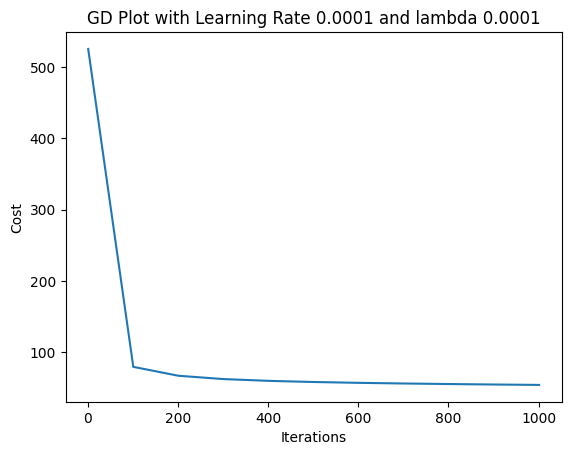

In [3]:
import matplotlib.pyplot as plt
cost = [iter_v_train(i, 0.0001, 0.0001)[0] for i in range(1, 1002, 100)]
plt.title('GD Plot with Learning Rate 0.0001 and lambda 0.0001')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.plot(range(1, 1002, 100), cost)

# Part 4

In [4]:
from sklearn.model_selection import train_test_split
def iter_v_train_SGD(iters, lrn, lam):
    np.random.seed(100)
    X = (mat['X'] - np.mean(mat['X'], axis = 0))/np.std(mat['X'], axis = 0)
    X = np.append(X, np.ones(5000).reshape(-1,1), axis=1)
    y = mat['y'].reshape(-1,1)
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

    w = np.zeros(len(X_train[0])).reshape(-1,1)

    learn_rate = lrn
    lamb = lam
    for i in range(iters):
        #np.random.seed(100)
        ind = np.random.choice(len(X_train))
        f = X_train[ind]
        s = scipy.special.expit(f@w)
        gradient = (-f.reshape(-1,1))*(y_train[ind] - s.reshape(-1,1)) + lamb*np.ones(13).reshape(-1,1)*w
        w = w - learn_rate*gradient

    s = scipy.special.expit(X_test@w)
    cost = np.sum(-y_test*np.log(s + 0.000001) - (np.ones(len(y_test)).reshape(-1,1) - y_test) * np.log(np.ones(len(s)).reshape(-1,1) - s + 0.000001)) + (lamb*np.transpose(w)@w)[0][0]
    return [cost, w]

In [5]:
iter_v_train_SGD(10000, 0.01, 0.00001)[0]

63.876644563178864

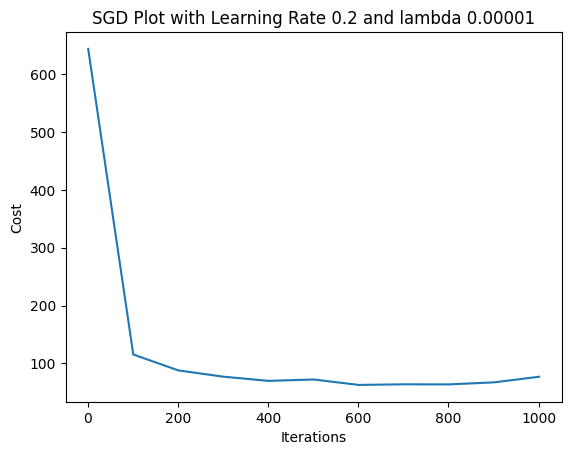

In [6]:
cost_SGD = [iter_v_train_SGD(i, 0.2, 0.00001)[0] for i in range(1, 1002, 100)]
plt.title('SGD Plot with Learning Rate 0.2 and lambda 0.00001')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.plot(range(1, 1002, 100), cost_SGD)

# Part 5

In [7]:
from sklearn.model_selection import train_test_split
def iter_v_train_SGD_STEP(iters, lrn, lam):
    np.random.seed(100)
    X = (mat['X'] - np.mean(mat['X'], axis = 0))/np.std(mat['X'], axis = 0)
    X = np.append(X, np.ones(5000).reshape(-1,1), axis=1)
    y = mat['y'].reshape(-1,1)
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

    w = np.zeros(len(X_train[0])).reshape(-1,1)

    learn_rate = lrn
    lamb = lam
    for i in range(1,iters):
        #np.random.seed(100)
        ind = np.random.choice(len(X_train))
        f = X_train[ind]
        s = scipy.special.expit(f@w)
        gradient = (-f.reshape(-1,1))*(y_train[ind] - s.reshape(-1,1)) + lamb*np.ones(13).reshape(-1,1)*w
        w = w - (learn_rate/i)*gradient

    s = scipy.special.expit(X_test@w)
    cost = np.sum(-y_test*np.log(s + 0.000001) - (np.ones(len(y_test)).reshape(-1,1) - y_test) * np.log(np.ones(len(s)).reshape(-1,1) - s + 0.000001)) + (lamb*np.transpose(w)@w)[0][0]
    return [cost, w]

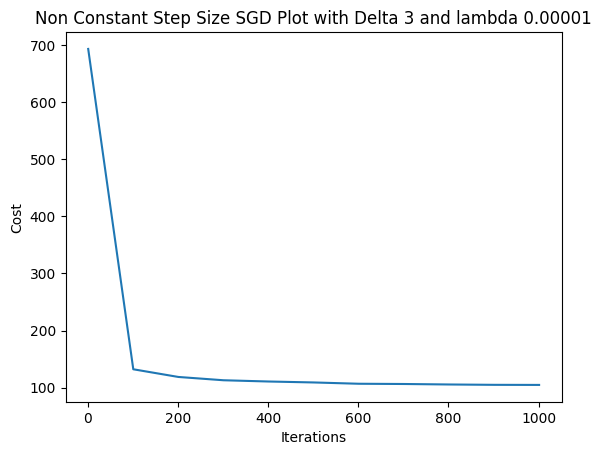

In [8]:
cost_SGD_STEP = [iter_v_train_SGD_STEP(i, 3, 0.00001)[0] for i in range(1, 1002, 100)]
plt.title('Non Constant Step Size SGD Plot with Delta 3 and lambda 0.00001')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.plot(range(1, 1002, 100), cost_SGD_STEP)

# Part 6 (Final Results)

In [9]:
import pandas as pd
import numpy as np

# Usage: results_to_csv(clf.predict(X_test))
def results_to_csv(y_test):
    y_test = y_test.astype(int)
    df = pd.DataFrame({'Category': y_test})
    df.index += 1 # Ensures that the index starts at 1
    df.to_csv('submission.csv', index_label='Id')

In [10]:
X = (mat['X'] - np.mean(mat['X'], axis = 0))/np.std(mat['X'], axis = 0)
X = np.append(X, np.ones(5000).reshape(-1,1), axis=1)
y = mat['y'].reshape(-1,1)

w = np.zeros(len(X[0])).reshape(-1,1)

learn_rate = 0.0001
lamb = 0.0001
for i in range(80000):
    s = scipy.special.expit(X@w)
    gradient = (-X).T@(y - s.reshape(-1,1)) + lamb*np.ones(13).reshape(-1,1)*w
    w = w - learn_rate*gradient

test = (mat['X_test'] - np.mean(mat['X_test'], axis = 0))/np.std(mat['X_test'], axis = 0)
test = np.append(test, np.ones(len(test)).reshape(-1,1), axis=1)
s = scipy.special.expit(test@w)
ans = []
for prob in s:
    if prob > 0.5:
        ans.append(1)
    else:
        ans.append(0)

In [11]:
ans = np.array(ans)
results_to_csv(ans)

In [12]:
#This is Newtons method which is not what we're doing
'''
from sklearn.model_selection import train_test_split

def iters(it):

    X = (mat['X'] - np.mean(mat['X'], axis = 0))/np.std(mat['X'], axis = 0)
    X = np.append(X, np.ones(5000).reshape(-1,1), axis=1)
    y = mat['y'].reshape(-1,1)
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

    w = np.zeros(len(X_train[0])).reshape(-1,1)
    e = np.zeros(len(X_train[0])).reshape(-1,1)

    lamb = 0.001

    for i in range(it):
        
        s = scipy.special.expit(X_train@w)
        omega = np.diagflat(s.T@np.diagflat((np.ones(len(X_train)).reshape(-1,1) - s)))

        e = np.linalg.solve(X_train.T @ omega @ X_train + lamb*np.ones(13).reshape(-1,1)*w, X_train.T@(y_train - s.reshape(-1,1)))
        w = w + e
        
    
    s = scipy.special.expit(X_test@w)

    cost = np.sum(-y_test*np.log(s + 0.000001) - (np.ones(len(y_test)) - y_test) * np.log(np.ones(len(y_test)) - s + 0.000001)) + (lamb*np.transpose(w)@w)[0][0]
    return (w, cost)
'''
print('f')

f
